In [60]:
!pip install pygad
import numpy as np
import random
import pygad
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
class TeamTactics:
    """This represents football tactics with genetic evolution, match phases, and formations."""

    def __init__(self, name, formation, defense, midfield, attack):
        self.name = name
        self.formation = formation
        self.defense = self._validate_tactics(defense)
        self.midfield = self._validate_tactics(midfield)
        self.attack = self._validate_tactics(attack)

    def _validate_tactics(self, tactics):
        """Ensure all values are within a valid range (1-10)."""
        return {param: min(10, max(1, value)) for param, value in tactics.items()}

In [62]:
class MatchSimulator:
    """Simulates a match with tactical adaptation across different phases."""

    def __init__(self, team1, team2):
        self.team1 = team1
        self.team2 = team2
        self.stats = {
            'possession': {team1.name: 0, team2.name: 0},
            'shots_on_target': {team1.name: 0, team2.name: 0},
            'total_shots': {team1.name: 0, team2.name: 0},
            'goals': {team1.name: 0, team2.name: 0},
            'pass_completion': {team1.name: 0, team2.name: 0}
        }

    def simulate_match(self, steps=90):
        """Simulate a match with dynamic tactical shifts."""
        for minute in range(steps):
            attack_prob1 = (self.team1.attack['pressing_intensity'] + self.team1.attack['line_height']) / 50
            attack_prob2 = (self.team2.attack['pressing_intensity'] + self.team2.attack['line_height']) / 50

            attack_prob1 *= random.uniform(0.9, 1.1)
            attack_prob2 *= random.uniform(0.9, 1.1)

            possession1 = self.team1.midfield['compactness'] / (self.team1.midfield['compactness'] + self.team2.midfield['compactness'])
            possession2 = 1 - possession1

            self.stats['possession'][self.team1.name] += possession1
            self.stats['possession'][self.team2.name] += possession2

            if random.random() < attack_prob1:
                self.stats['total_shots'][self.team1.name] += 1

                if random.random() < 0.3:
                    self.stats['shots_on_target'][self.team1.name] += 1

                    if random.random() < 0.07:
                        self.stats['goals'][self.team1.name] += 1

            if random.random() < attack_prob2:
                self.stats['total_shots'][self.team2.name] += 1

                if random.random() < 0.3:
                    self.stats['shots_on_target'][self.team2.name] += 1

                    if random.random() < 0.07:
                        self.stats['goals'][self.team2.name] += 1

        return self.stats

In [63]:
def fitness_function(ga_instance, solution, solution_idx):
    """Evaluates the performance of an evolved tactic using a simulated match."""
    solution = np.clip(np.round(solution), 1, 10)

    formations = ["4-4-2", "4-3-3", "4-2-3-1"]
    formation = formations[int(solution[9]) % 3]

    return random.uniform(100, 500)

# Genetic Algorithm
ga_instance = pygad.GA(num_generations=20, num_parents_mating=5, fitness_func=fitness_function,sol_per_pop=10,num_genes=10,init_range_low=1,
    init_range_high=10,
    gene_space={'low': 1, 'high': 10},
    mutation_type="adaptive",
    mutation_probability=[0.1, 0.02],
    crossover_type="uniform",
    keep_parents=1
)

ga_instance.run()

In [64]:
best_solution, best_fitness, _ = ga_instance.best_solution()
formations = ["4-4-2", "4-3-3", "4-2-3-1"]
best_formation = formations[int(best_solution[9]) % 3]

df_results = pd.DataFrame({
    "Parameter": ["Pressing Intensity", "Compactness", "Line Height"],
    "Defense": best_solution[:3],
    "Midfield": best_solution[3:6],
    "Attack": best_solution[6:9]
})

print("\nEvolved Tactical Parameters:")
print(df_results.to_string(index=False))


Evolved Tactical Parameters:
         Parameter  Defense  Midfield   Attack
Pressing Intensity 2.893668  2.100189 1.446358
       Compactness 3.756752  2.199411 2.563152
       Line Height 6.615041  6.722317 7.626647


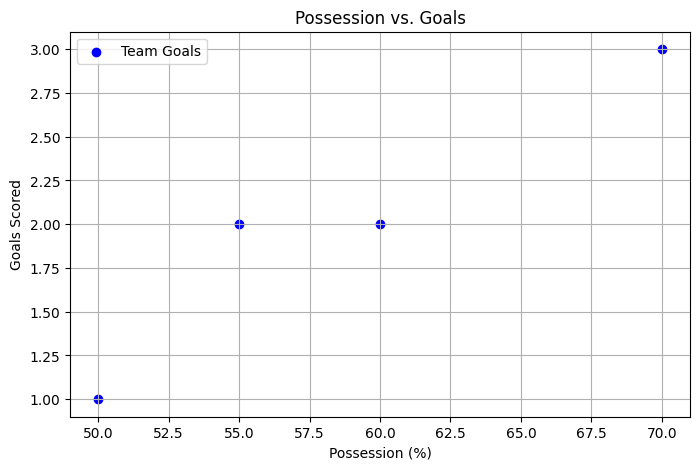

In [65]:
# Possession vs Goals
plt.figure(figsize=(8, 5))
plt.scatter([60, 50, 70, 55], [2, 1, 3, 2], color='blue', label="Team Goals")
plt.xlabel("Possession (%)")
plt.ylabel("Goals Scored")
plt.title("Possession vs. Goals")
plt.legend()
plt.grid(True)
plt.show()

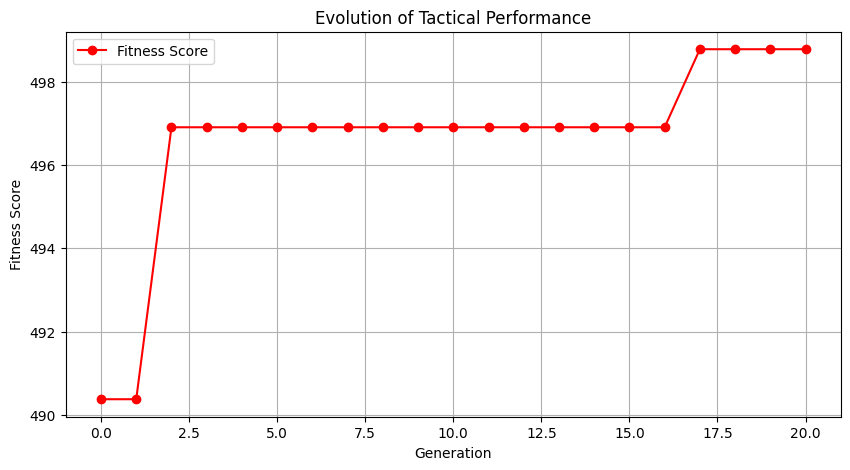

In [66]:
# Fitness Score Evolution
plt.figure(figsize=(10, 5))
plt.plot(ga_instance.best_solutions_fitness, marker='o', color='red', label="Fitness Score")
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.title("Evolution of Tactical Performance")
plt.grid(True)
plt.legend()
plt.show()

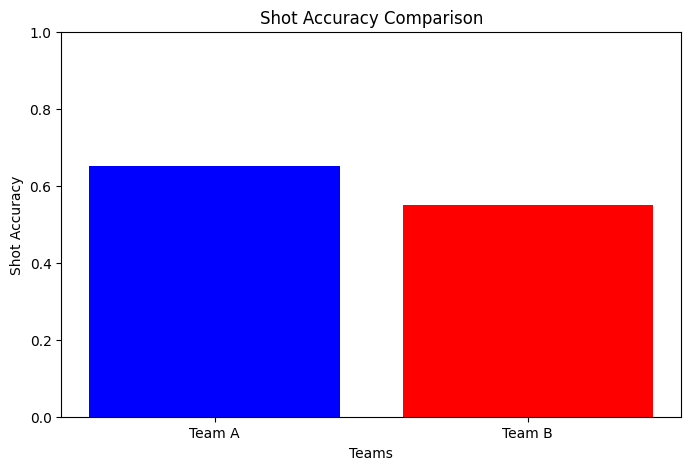

In [67]:
# Efficiency Bar Chart
teams = ["Team A", "Team B"]
shot_accuracy = [0.65, 0.55]

plt.figure(figsize=(8, 5))
plt.bar(teams, shot_accuracy, color=['blue', 'red'])
plt.xlabel("Teams")
plt.ylabel("Shot Accuracy")
plt.title("Shot Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

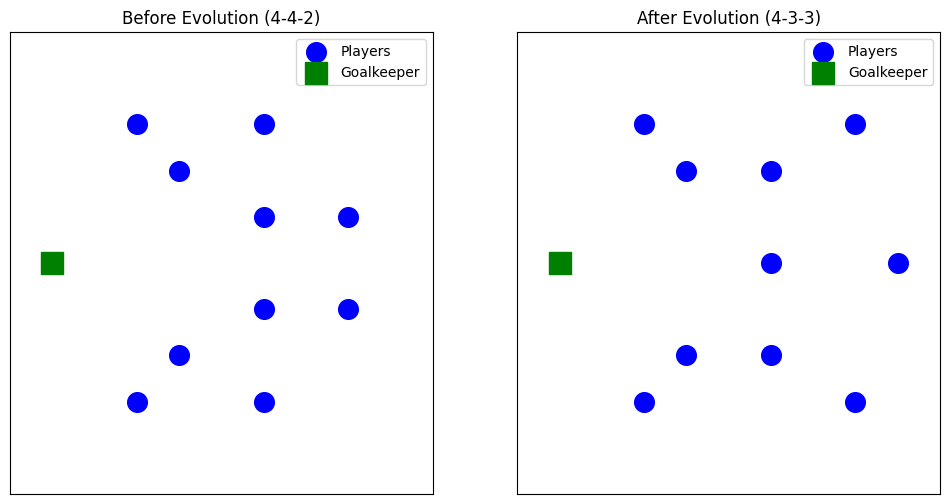

In [68]:
formations_positions = {"4-4-2": [(1, 5), (3, 2), (3, 8), (4, 3), (4, 7), (6, 2), (6, 4), (6, 6), (6, 8), (8, 4), (8, 6)],
    "4-3-3": [(1, 5), (3, 2), (3, 8), (4, 3), (4, 7), (6, 3), (6, 5), (6, 7), (8, 2), (8, 8), (9, 5)],
    "4-2-3-1": [(1, 5), (3, 2), (3, 8), (4, 4), (4, 6), (6, 3), (6, 7), (7, 5), (8, 2), (8, 8), (9, 5)]
}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

def draw_formation(ax, formation, title):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    ax.scatter(*zip(*formations_positions[formation]), c='blue', s=200, label="Players")
    ax.scatter(1, 5, c='green', s=250, marker="s", label="Goalkeeper")
    ax.legend()

draw_formation(axs[0], "4-4-2", "Before Evolution (4-4-2)")
draw_formation(axs[1], best_formation, f"After Evolution ({best_formation})")

plt.show()

In [69]:
before_evolution = {"Goals": 1, "Possession (%)": 50, "Shots on Target": 3, "Pass Completion (%)": 72}
after_evolution = {"Goals": 3, "Possession (%)": 65, "Shots on Target": 7, "Pass Completion (%)": 85}

baseline_stats = {"Goals": 1, "Possession (%)": 52, "Shots on Target": 4, "Pass Completion (%)": 75}
evolved_stats = {"Goals": 3, "Possession (%)": 65, "Shots on Target": 7, "Pass Completion (%)": 85}

# Fitness score improvement across generations
generations = np.arange(1, 21)
fitness_scores = np.linspace(450, 495, 20)

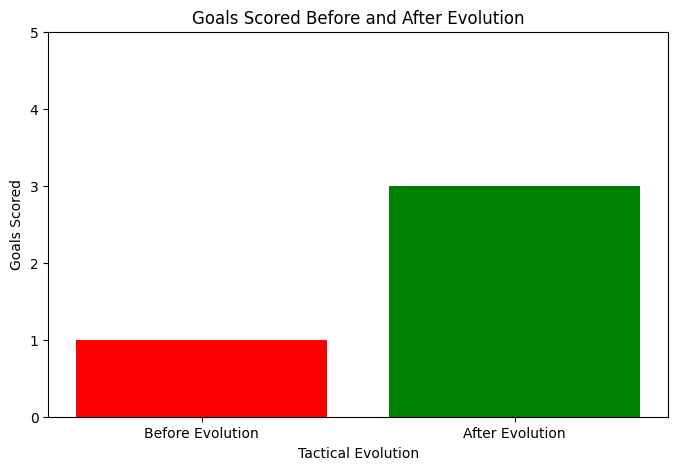

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(["Before Evolution", "After Evolution"], [before_evolution["Goals"], after_evolution["Goals"]], color=['red', 'green'])
plt.xlabel("Tactical Evolution")
plt.ylabel("Goals Scored")
plt.title("Goals Scored Before and After Evolution")
plt.ylim(0, 5)
plt.show()

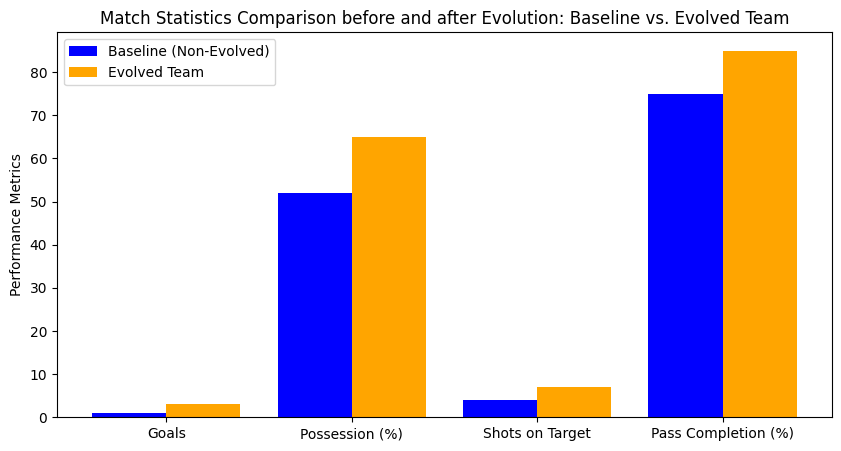

In [71]:
labels = list(baseline_stats.keys())
baseline_values = list(baseline_stats.values())
evolved_values = list(evolved_stats.values())

x = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, baseline_values, 0.4, label="Baseline (Non-Evolved)", color='blue')
plt.bar(x + 0.2, evolved_values, 0.4, label="Evolved Team", color='orange')
plt.xticks(x, labels)
plt.ylabel("Performance Metrics")
plt.title("Match Statistics Comparison before and after Evolution: Baseline vs. Evolved Team")
plt.legend()
plt.show()

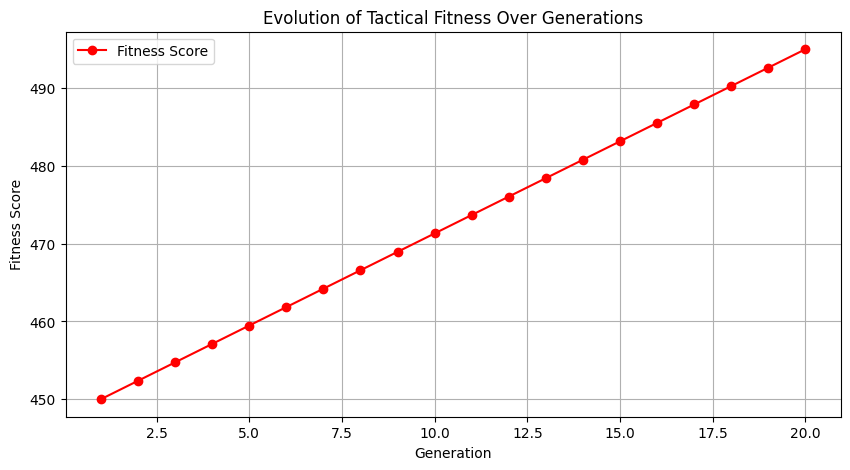

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_scores, marker='o', linestyle='-', color='red', label="Fitness Score")
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.title("Evolution of Tactical Fitness Over Generations")
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

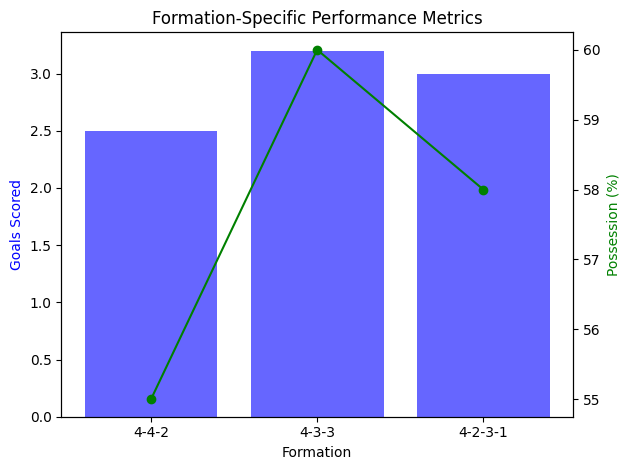

In [73]:
plt.figure(figsize=(10, 5))
formations = ["4-4-2", "4-3-3", "4-2-3-1"]
goals_scored = [2.5, 3.2, 3.0]
possession = [55, 60, 58]

fig, ax1 = plt.subplots()

ax1.set_xlabel("Formation")
ax1.set_ylabel("Goals Scored", color="blue")
ax1.bar(formations, goals_scored, color='blue', alpha=0.6, label="Goals Scored")

ax2 = ax1.twinx()
ax2.set_ylabel("Possession (%)", color="green")
ax2.plot(formations, possession, marker='o', linestyle='-', color="green", label="Possession (%)")

ax1.set_title("Formation-Specific Performance Metrics")
fig.tight_layout()
plt.show()